In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("/content/IceCreamData.csv")
data.describe()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


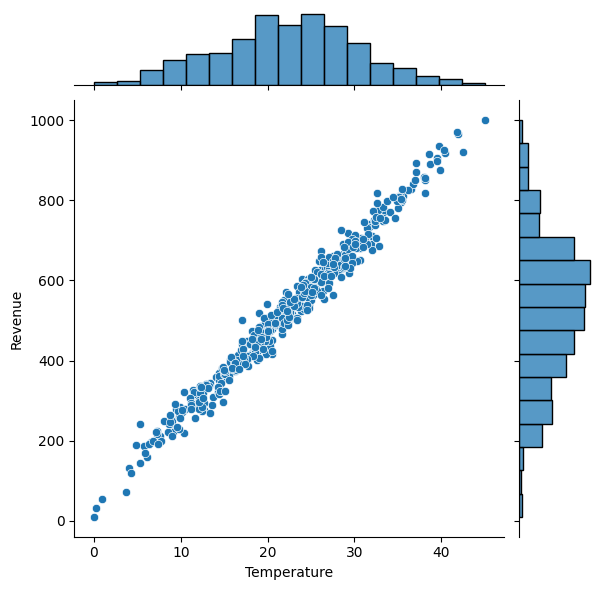

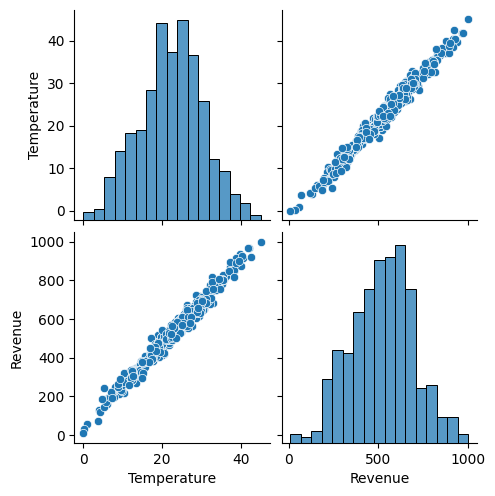

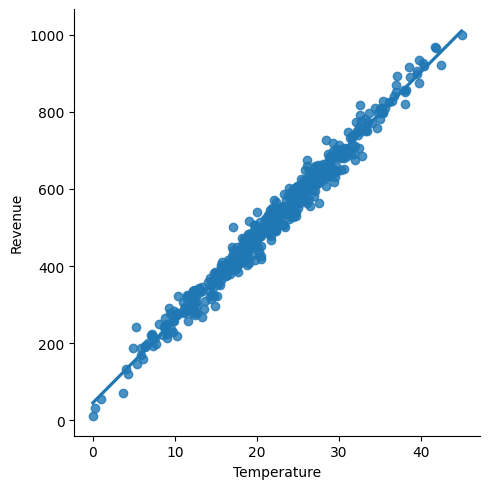

In [8]:
sns.jointplot(x='Temperature', y='Revenue', data = data)
sns.pairplot(data)
sns.lmplot(x='Temperature', y='Revenue', data=data)


In [10]:
y = data['Revenue']
X = data[['Temperature']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [11]:
X_train.shape

from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept =True)
regressor.fit(X_train,y_train)

print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [21.43437506]
Linear Model Coefficient (b):  44.88203060852379


Predicted Revenue at 30 degC: 687.91 dollars


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


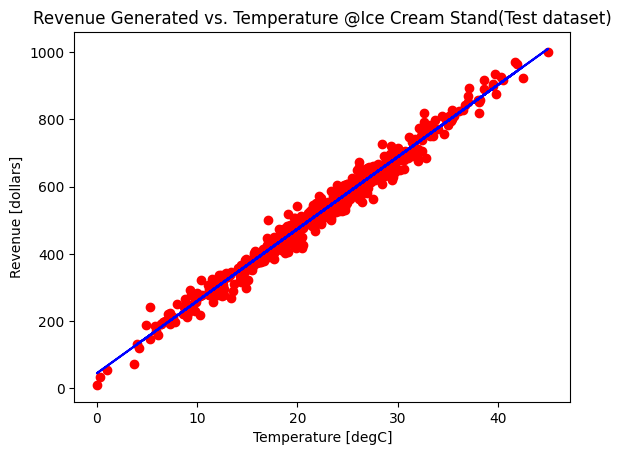

In [13]:
y_predict = regressor.predict( X_test)
y_predict
y_test


plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')


plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Test dataset)')

predicted_revenue_at_30deg = regressor.predict(np.array([[30]]))
print(f'Predicted Revenue at 30 degC: {predicted_revenue_at_30deg[0]:.2f} dollars')